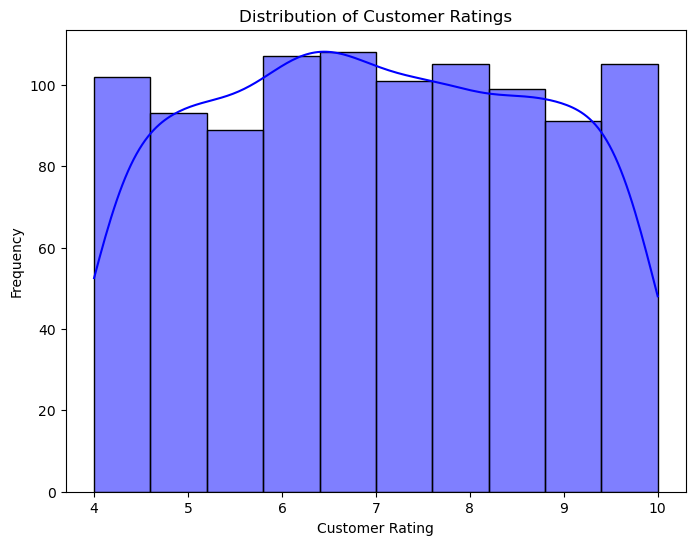

Skewness of Customer Ratings: 0.00900964876573073


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("supermarket_sales.csv")

# Customer Rating Analysis
# Create a histogram of customer ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.show()

# Calculate the skewness of customer ratings
skewness = data['Rating'].skew()
print("Skewness of Customer Ratings:", skewness)

In [ ]:
#Ans :The rating distribution looks uniform and there seems to be no skewness on the left or right side of the distribution.

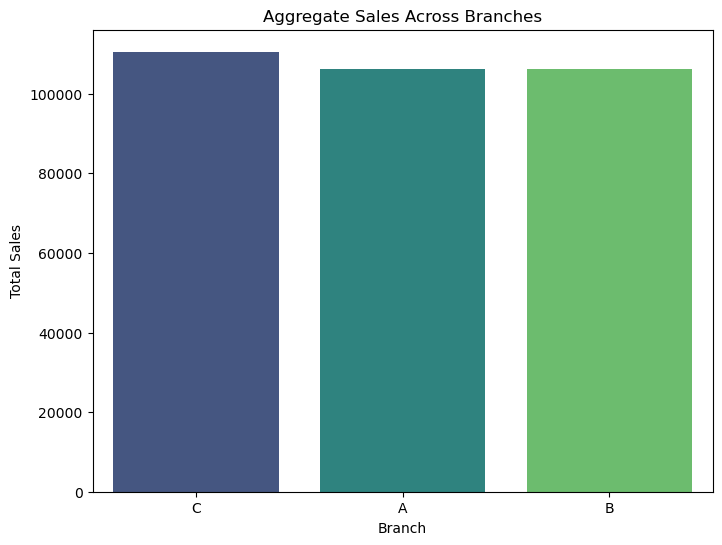

Total Sales by Branch:
Branch
C    110568.7065
A    106200.3705
B    106197.6720
Name: Total, dtype: float64


In [3]:
# Aggregate Sales Across Branches

# Group data by branch and calculate total sales for each branch
branch_sales = data.groupby('Branch')['Total'].sum().sort_values(ascending=False)

# Create a bar plot to visualize the aggregate sales across branches
plt.figure(figsize=(8, 6))
sns.barplot(x=branch_sales.index, y=branch_sales.values, palette="viridis")
plt.title('Aggregate Sales Across Branches')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

# Display the total sales for each branch
print("Total Sales by Branch:")
print(branch_sales)

In [ ]:
#Ans: There is not much difference in sales across the 3 branches of A, B and C. The sales in branch C is a bit higher than the 
      rest of the branches.

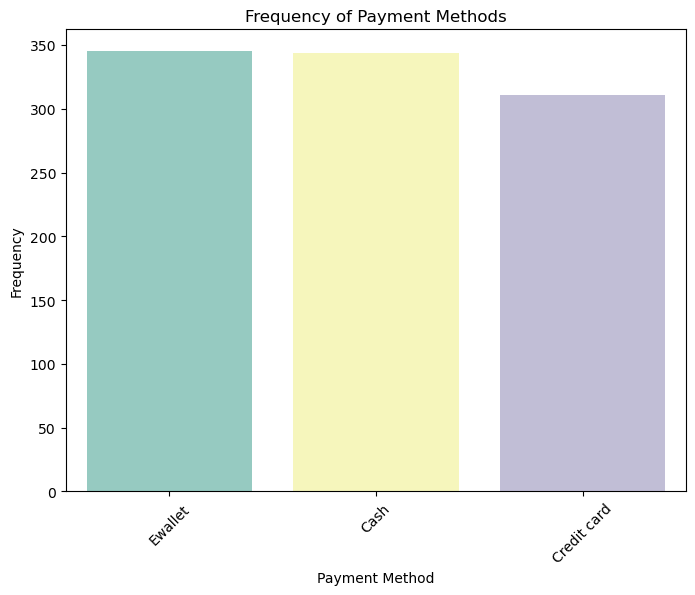

Most Popular Payment Method: Ewallet


In [15]:
#  Most Popular Payment Method

# Create a countplot to visualize the frequency of each payment method
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Payment', palette="Set3")
plt.title('Frequency of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Calculate the mode (most common) payment method
most_common_payment = data['Payment'].mode()[0]
print("Most Popular Payment Method:", most_common_payment)

In [ ]:
#Ans: The most popular payment method is in-fact E-wallet.

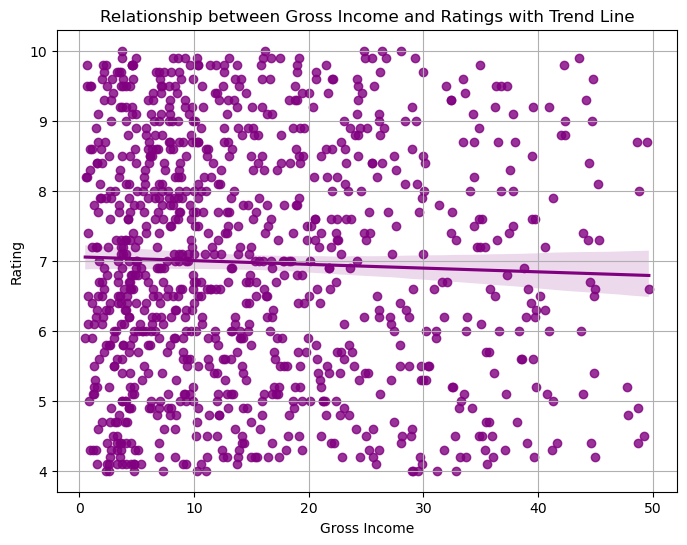

In [6]:
# Q4: Relationship between Gross Income and Ratings

# Create a scatter plot with a trend line
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x='gross income', y='Rating', color='purple')
plt.title('Relationship between Gross Income and Ratings with Trend Line')
plt.xlabel('Gross Income')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [ ]:
#Ans: As you can see from the scatter plot and the trend line which is pretty flat that there is no relationship between
    gross income of a customer and his rating.

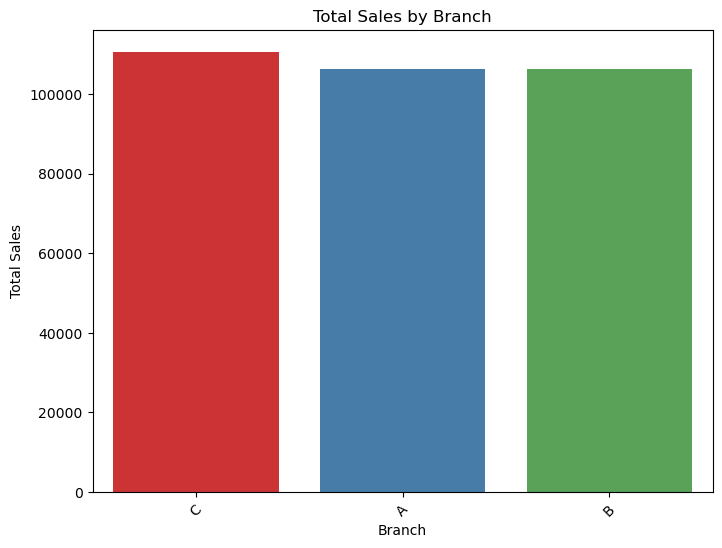

Most Profitable Branch: C
Branch
C    110568.7065
A    106200.3705
B    106197.6720
Name: Total, dtype: float64


In [16]:
# Most Profitable Branch

# Group data by branch and calculate total sales for each branch
branch_profit = data.groupby('Branch')['Total'].sum().sort_values(ascending=False)

# Create a bar plot to visualize the total sales for each branch
plt.figure(figsize=(8, 6))
sns.barplot(x=branch_profit.index, y=branch_profit.values, palette="Set1")
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Identify the most profitable branch
most_profitable_branch = branch_profit.idxmax()
print("Most Profitable Branch:", most_profitable_branch)
print(branch_profit)

In [ ]:
#Ans: Branch C is the most profitable branch

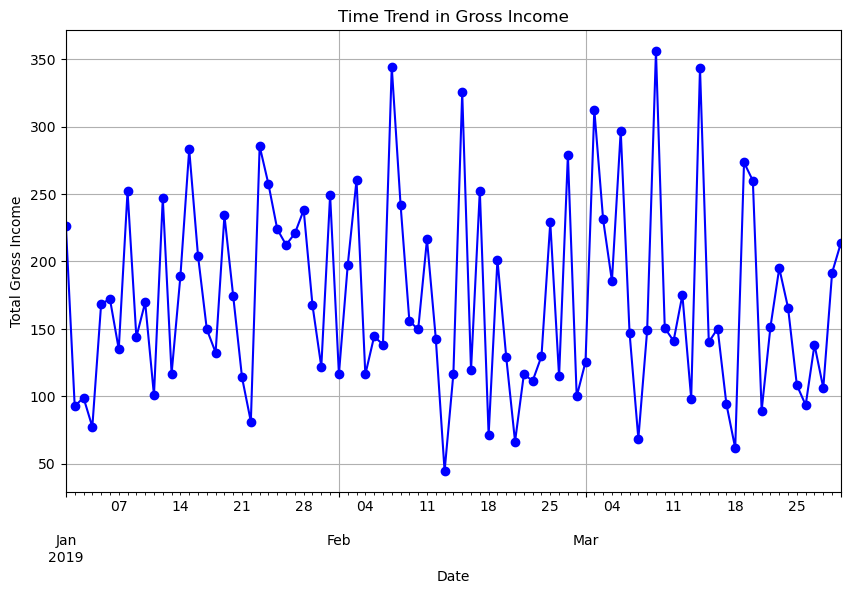

In [18]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

#  Time Trend in Gross Income

# Group data by date and calculate total gross income for each date
gross_income_trend = data.groupby('Date')['gross income'].sum()

# Create a line plot to visualize the time trend in gross income
plt.figure(figsize=(10, 6))
gross_income_trend.plot(kind='line',marker='o', color='blue')
plt.title('Time Trend in Gross Income')
plt.xlabel('Date')
plt.ylabel('Total Gross Income')
plt.grid(True)
plt.show()

In [ ]:
#Ans: No particular time trend is observed except for some days when the gross income is pretty high or pretty low.
     Overall it remains at a certain average level.

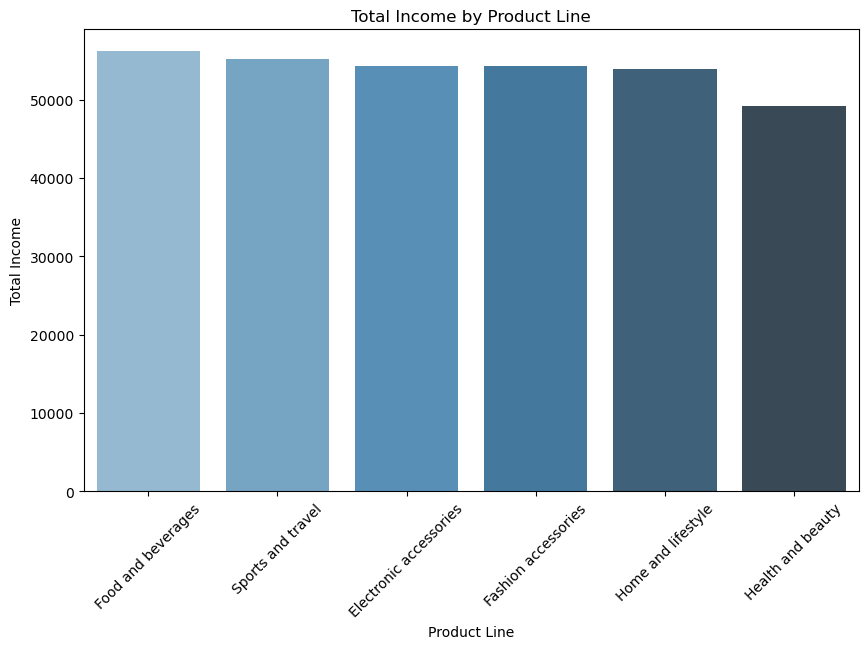

Most Income Generating Product Line: Food and beverages


In [9]:
# Most Income Generating Product Line

# Group data by product line and calculate total income for each line
product_line_income = data.groupby('Product line')['Total'].sum().sort_values(ascending=False)

# Create a bar plot to visualize the total income for each product line
plt.figure(figsize=(10, 6))
sns.barplot(x=product_line_income.index, y=product_line_income.values, palette="Blues_d")
plt.title('Total Income by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.show()

# Identify the product line generating the most income
most_income_generating_line = product_line_income.idxmax()
print("Most Income Generating Product Line:", most_income_generating_line)

In [ ]:
# Ans: Most Income Generating Product Line: Food and beverages

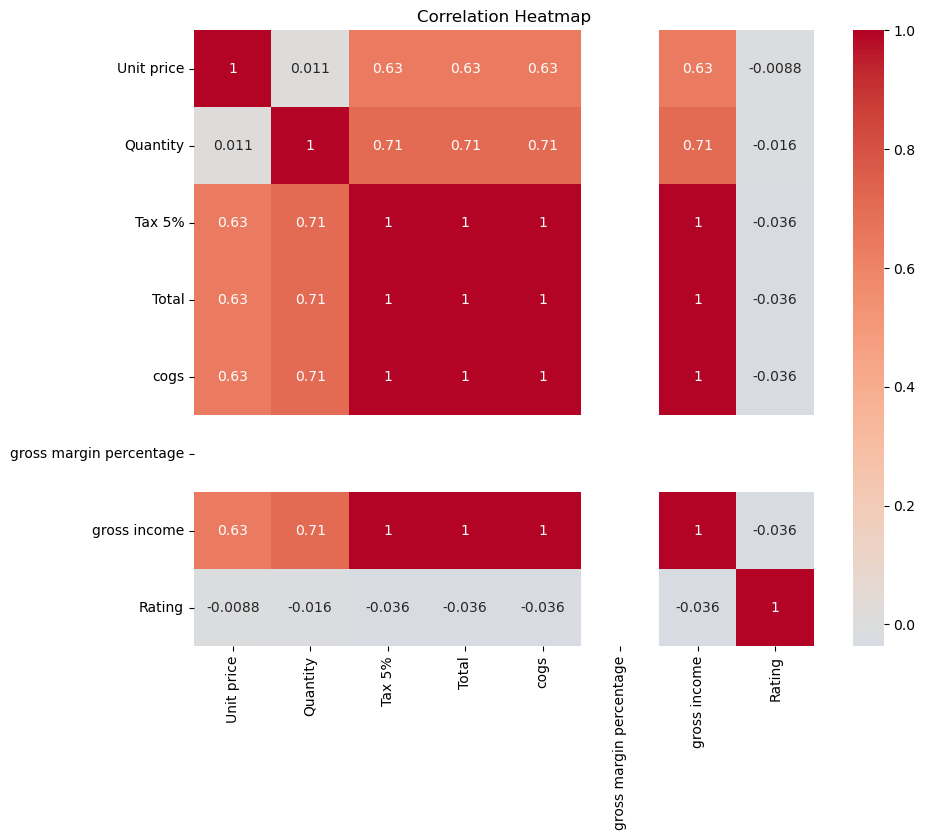

In [10]:
#  Correlation Heatmap

# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Ans: As you can see, unit price is positively correlated to cogs with 63% correlation. Another interesting observation is that 
‘Ratings’ hardly has any correlation with any other variables. Quantity and gross income has very high correlation of 71%.